Machine Learning Models
===============================================
Participatory Breeding Paper
-----------------------
**Christopher Mujjabi**


First, we import these packages and modules that will help us with reading our datasets and constructing visualizations. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.transforms as transforms

#### Importing the dataset and reassigning missing values

In [24]:
Data = pd.read_csv("Weather_Data_Stacked.csv")
print(Data)

         site  year month    prcp        srad       tmax       tmin  \
0       Adsit  2018   May  162.82  372.140645  74.555484  50.554516   
1       Adsit  2018   Jun  183.08  352.080333  76.914200  57.709400   
2       Adsit  2018   Jul   59.46  398.134839  82.159613  59.630581   
3       Adsit  2018   Aug  131.14  340.136774  81.326968  60.689097   
4       Adsit  2018   Sep  222.38  315.131000  74.063600  53.265800   
..        ...   ...   ...     ...         ...        ...        ...   
215  Zinniker  2019   May  176.41  360.190645  64.493484  43.957806   
216  Zinniker  2019   Jun  135.75  385.730333  75.620000  53.782400   
217  Zinniker  2019   Jul   98.71  376.202903  84.093161  62.595935   
218  Zinniker  2019   Aug  100.26  364.968710  78.509097  56.369677   
219  Zinniker  2019   Sep  218.92  287.288000  74.447600  56.092400   

          temp      GDD  
0    62.555000  383.319  
1    67.311800  508.788  
2    70.895097  640.179  
3    71.008032  644.850  
4    63.664700  4

In [25]:
Data.describe()

,year,prcp,srad,tmax,tmin,temp,GDD
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2019.227273,124.381273,363.725273,78.952726,58.044203,68.498464,556.537541
std,0.952374,58.049268,28.793957,5.938784,5.851389,5.833371,173.269238
min,2018.000000,11.400000,277.836333,64.493484,43.286581,53.926613,123.777000
25%,2018.000000,84.097500,351.111167,75.363050,53.767284,64.725050,441.423000
50%,2019.000000,120.600000,366.952527,81.079613,59.198852,69.985952,605.790000
75%,2020.000000,155.040000,383.242532,83.553539,62.979597,73.110737,691.362000
max,2021.000000,351.810000,413.618000,87.312258,67.249226,77.280742,810.414000


####  Relationship between different weather variables


##### 1. Min and Max Temperature 

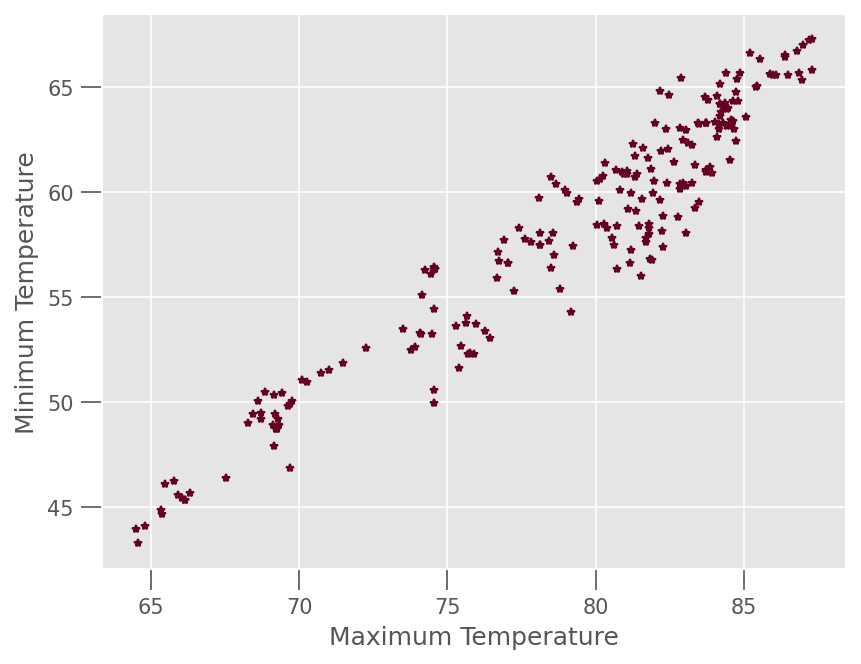

In [26]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Data['tmax'], Data['tmin'],
            linestyle='', c='#650021', marker='*', markersize=4)
    ax.set_ylabel("Minimum Temperature")
    ax.set_xlabel("Maximum Temperature")
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="both", which="major", labelsize=10, size=10)
plt.show()

##### 2. Temperature and Precipitation

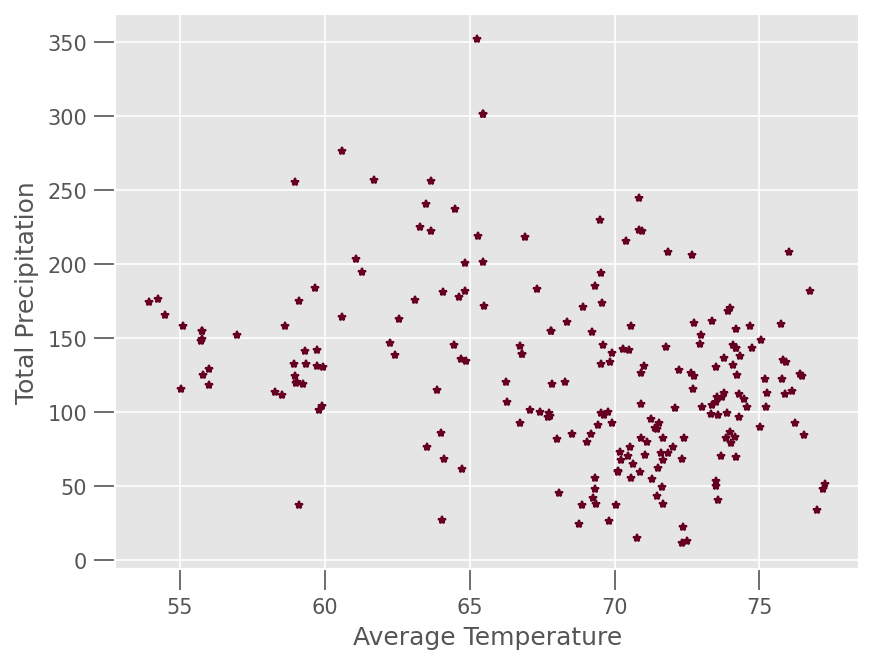

In [27]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Data['temp'], Data['prcp'],
            linestyle='', c='#650021', marker='*', markersize=4)
    ax.set_ylabel("Total Precipitation")
    ax.set_xlabel("Average Temperature")
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="both", which="major", labelsize=10, size=10)
    plt.show()

### Subset data by year

In [28]:
subset_2018 = Data[Data['year'] == 2018]
subset_2010 = Data[Data['year'] == 2019]
subset_2020 = Data[Data['year'] == 2020]
subset_2021 = Data[Data['year'] == 2021]

#### Precipitation

In [40]:
month_order = ['May', 'Jun', 'Jul', 'Aug']
pivot_df1 = subset_2018.pivot(
    index='month', columns='site', values='prcp').reindex(month_order)

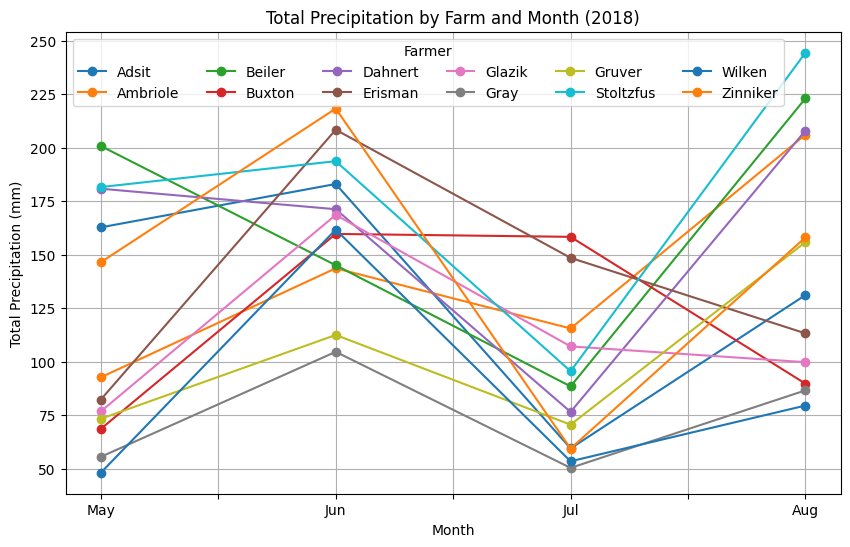

In [41]:
pivot_df1.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.title('Total Precipitation by Farm and Month (2018)')
plt.grid(True)
plt.legend(title='Farmer', loc='upper left', ncol=6)
plt.show()

#### Solar Radiation

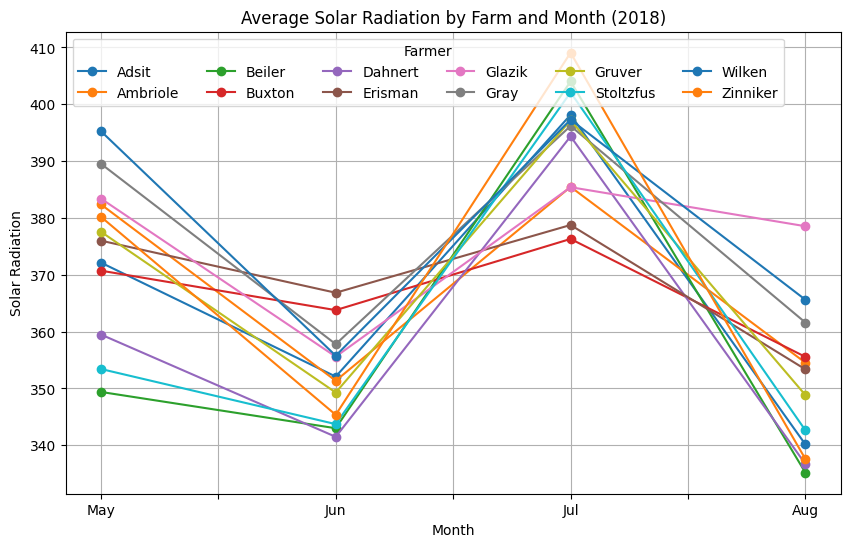

In [33]:
month_order = ['May', 'Jun', 'Jul', 'Aug']
Srad_df = subset_2018.pivot(
    index='month', columns='site', values='srad').reindex(month_order)
Srad_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Solar Radiation')
plt.title('Average Solar Radiation by Farm and Month (2018)')
plt.grid(True)
plt.legend(title='Farmer', loc='upper left', ncol=6)
plt.show()

#### Average Temperature

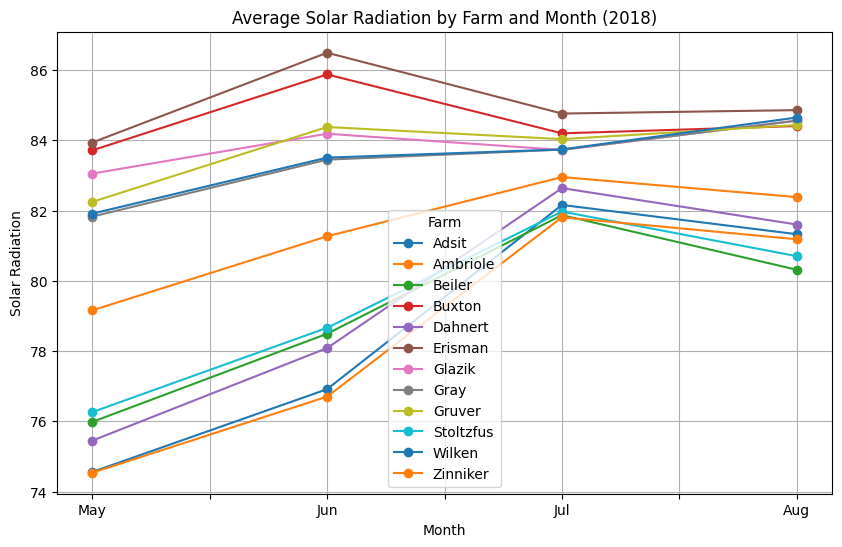

In [44]:
month_order = ['May', 'Jun', 'Jul', 'Aug']
Temp_df = subset_2018.pivot(
    index='month', columns='site', values='tmax').reindex(month_order)
Temp_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Solar Radiation')
plt.title('Average Solar Radiation by Farm and Month (2018)')
plt.grid(True)
plt.legend(title='Farm')
plt.show()

In [ ]:
Adsit_srad2018 = Adsit2018.groupby("month")["srad"].sum()

In [ ]:
Adsit_temp2018 = Adsit2018.groupby("month")["temp"].sum()

In [61]:
# Prcp_2018Site = Prcp_2018Site.stack().reset_index()

Prcp_2018Site.columns = ['Farm', 'Month', 'prcp']
Farms = Prcp_2018Site.index['Farm'].unique()
print(sorted(Farms))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [63]:
Prcp_2018Site = pd.DataFrame(Prcp_2018Site)
print(Prcp_2018Site)

                  prcp
Farm      month       
Adsit     Aug     9.18
          Jul     0.72
          Jun    43.94
          May    36.71
          Sep    23.36
Ambriole  Aug    16.37
          Jul     2.99
          Jun    60.19
          May    16.66
          Sep    11.65
Beiler    Aug    10.99
          Jul     0.00
          Jun    31.65
          May    39.88
          Sep    32.20
Buxton    Aug     3.44
          Jul     8.07
          Jun    56.16
          May     2.71
          Sep    40.70
Dahnert   Aug    15.58
          Jul     0.99
          Jun    22.41
          May    32.89
          Sep    30.90
Erisman   Aug     5.86
          Jul     2.05
          Jun    70.23
          May     6.69
          Sep    36.67
Glazik    Aug     0.00
          Jul     3.79
          Jun    15.49
          May     5.11
          Sep    37.72
Gray      Aug    19.88
          Jul     2.85
          Jun    18.51
          May     6.82
          Sep    13.82
Gruver    Aug     6.12
          J

In [64]:
prcp_df = pd.DataFrame(Prcp_Site)
prcp_df = prcp_df.pivot(index='site', columns='month', values='prcp')

KeyError: 'site'

In [25]:

prcp_df = Prcp_Site.pivot(index='site', columns='month', values='prcp')

# Create the plot
plt.figure(figsize=(10, 6))
for site, data in prcp_df.iterrows():
    plt.plot(data.index, data.values, label=site)

# Customize the plot
plt.title('Percentage Trends by Site and Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

AttributeError: 'Series' object has no attribute 'pivot'

In [22]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.bar(Prcp_Site.index, Prcp_Site,  width=1,
           edgecolor="white", linewidth=1, color='#653700')
    ax.set(xlim=(0, 19), xticks=np.arange(0, 19))
    ax.set_yscale("linear")
    ax.set_xscale("linear")
    ax.set_ylabel("Total Square Footage")
    ax.set_xlabel("Congressional District")
    # ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17, 18])
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="y", which="major", labelsize=15, size=5)
    ax.tick_params(axis="x", which="minor", labelsize=15, size=5)

plt.show()

TypeError: 'value' must be an instance of str or bytes, not a tuple

The graph above shows that congressional district 13 had the highest number of total square footage while congrestional district 9 had the lowest square footage, compared to the rest of the districts. Buildings under district 0 where disregarded or considered unassigned to a district, hence only plotting data from district 1 to 18. 

It successfully displayed the data using a bar graph, which made it easy to visualize the distribution of square footage across the different congressional districts. Axis labeling,color setting, and setting the axis scale (particularly the y-axis) was easy to do since we saw this in class. 

#### 3. Average square footage per floor as a function of congressional district

In [153]:
Footage_Per_Dist = Data.groupby("Congress Dist")["Square Footage"].sum()
Footage_Per_Dist

Congress Dist
1.0      2351762.0
2.0      6285684.0
3.0      1293687.0
4.0       317741.0
5.0      1809022.0
6.0       145659.0
7.0      9211651.0
8.0      1461548.0
9.0        77978.0
10.0      929267.0
11.0     3467894.0
12.0    12444775.0
13.0    31849251.0
14.0      857108.0
15.0     7209934.0
16.0     8725880.0
17.0     4347743.0
18.0     8120838.0
Name: Square Footage, dtype: float64

In [152]:
Floors_Per_Dist = Data.groupby("Congress Dist")["Total Floors"].sum()
Floors_Per_Dist

Congress Dist
1.0      134.0
2.0      647.0
3.0       72.0
4.0       21.0
5.0      113.0
6.0       28.0
7.0      517.0
8.0      312.0
9.0       11.0
10.0     213.0
11.0     411.0
12.0    2339.0
13.0    2896.0
14.0     319.0
15.0    1872.0
16.0    1654.0
17.0     924.0
18.0    1800.0
Name: Total Floors, dtype: float64

In [155]:
average_footage_floor = Footage_Per_Dist/Floors_Per_Dist
average_footage_floor

Congress Dist
1.0     17550.462687
2.0      9715.122102
3.0     17967.875000
4.0     15130.523810
5.0     16009.044248
6.0      5202.107143
7.0     17817.506770
8.0      4684.448718
9.0      7088.909091
10.0     4362.755869
11.0     8437.698297
12.0     5320.553655
13.0    10997.669544
14.0     2686.858934
15.0     3851.460470
16.0     5275.622733
17.0     4705.349567
18.0     4511.576667
dtype: float64

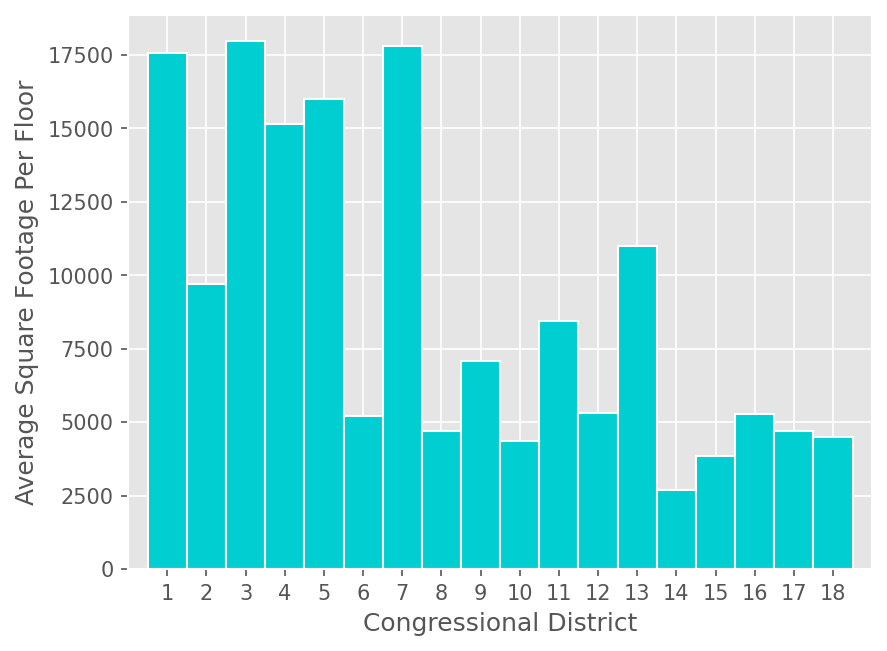

In [206]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.bar(average_footage_floor.index, average_footage_floor,  width=1,
           edgecolor="white", linewidth=1, color='darkturquoise')
    ax.set(xlim=(0, 18), xticks=np.arange(0, 20))
    ax.set_yscale("linear")
    ax.set_xscale("linear")
    ax.set_ylabel("Average Square Footage Per Floor")
    ax.set_xlabel("Congressional District")
    ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18])
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="y", which="minor", labelsize=15, size=5)
    ax.tick_params(axis="x", which="minor", labelsize=15, size=5)
plt.show()

The the bar graph above represents the average square footage per floor in each of the 18 congressional districts. District 3, 7 and 1 have the highest average square footage per floor, while district 14 has the lowest. I decided to use a bargraph because it can clearly display the distribution of square footage across districts. 

I would have liked to include error bars at each bar to show the variability in building sizes. But I couldnt figure out how to add this feature to my bar graph. 

#### 4. Square footage for the five most common departments as a function of year

In [226]:
# First, I wanted to find the the 5 most common departments in the dataset
Top_5_Departments = Data['Agency Name'].value_counts().head(5)
Top_5_Departments

Agency Name
Department of Natural Resources    3223
Department of Corrections          1428
Department of Transportation       1137
Department of Human Services        617
University of Illinois              525
Name: count, dtype: int64

In [ ]:
Sites_2018

Sites_2019

Sites_2020

Sites_2021

In [312]:
# Then I created a separate dataset with only the selected 5 common departments I found in the previous step.

Common_Departments = ['Department of Natural Resources', 'Department of Corrections',
                      'Department of Transportation', 'Department of Human Services', 'University of Illinois']
Common_Departments = Data[Data['Agency Name'].isin(Common_Departments)]

In [313]:
# Then i created 5 different subsets, separating each of the 5 departments

Natural_Resources = Common_Departments[Common_Departments['Agency Name']
                                       == 'Department of Natural Resources']
Corrections = Common_Departments[Common_Departments['Agency Name']
                                 == 'Department of Corrections']
Transportation = Common_Departments[Common_Departments['Agency Name']
                                    == 'Department of Transportation']
Human_Services = Common_Departments[Common_Departments['Agency Name']
                                    == 'Department of Human Services']
UIUC = Common_Departments[Common_Departments['Agency Name']
                          == 'University of Illinois']

In [328]:
# Then I calculated the culumative square footage of each department over the years (year acquired)

Natural_Resources_per_year = Natural_Resources.groupby("Year Acquired")[
    "Square Footage"].sum()
Natural_Resources_cumulative = Natural_Resources_per_year.cumsum()

Corrections_per_year = Corrections.groupby(
    "Year Acquired")["Square Footage"].sum()
Corrections_cumulative = Corrections_per_year.cumsum()

Transportation_per_year = Transportation.groupby(
    "Year Acquired")["Square Footage"].sum()
Transportation_cumulative = Transportation_per_year.cumsum()

Human_Services_Per_year = Human_Services.groupby(
    "Year Acquired")["Square Footage"].sum()
Human_Services_cumulative = Human_Services_Per_year.cumsum()

UIUC_per_year = UIUC.groupby("Year Acquired")["Square Footage"].sum()
UIUC_cumulative = UIUC_per_year.cumsum()

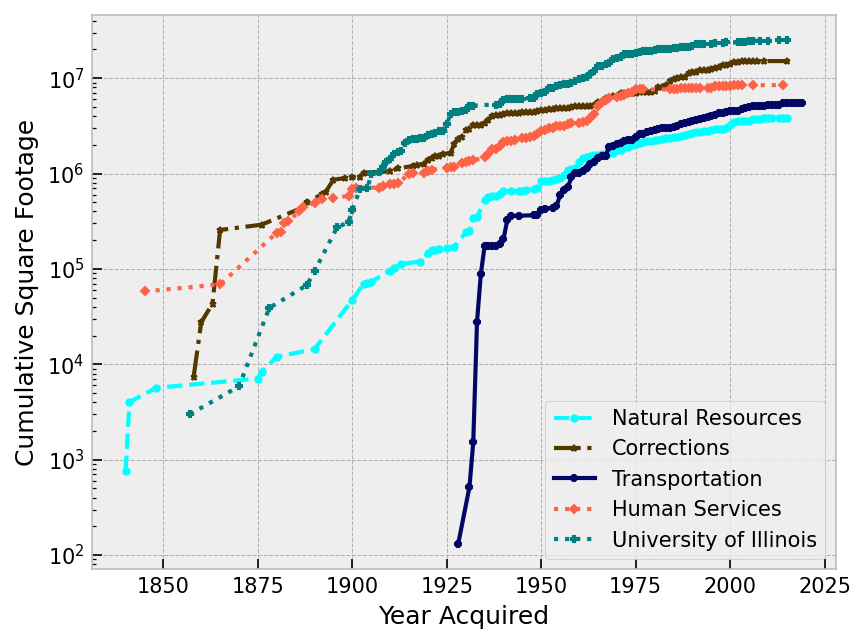

In [352]:
# Then I plotted each department, individually on the same plot.

with plt.style.context("bmh"):
    fig, ax = plt.subplots(dpi=150)
    plt.plot(Natural_Resources_cumulative.index, Natural_Resources_cumulative,
             label='Natural Resources', linestyle='--', c='#00FFFF', marker='o', markersize=3)
    plt.plot(Corrections_cumulative.index, Corrections_cumulative,
             label='Corrections', linestyle='-.', c='#553700', marker='*', markersize=3)
    plt.plot(Transportation_cumulative.index, Transportation_cumulative,
             label='Transportation', linestyle='-', c='#030764', marker='8', markersize=3)
    plt.plot(Human_Services_cumulative.index, Human_Services_cumulative,
             label='Human Services', linestyle=':', c='#FF6347', marker='D', markersize=3)
    plt.plot(UIUC_cumulative.index, UIUC_cumulative,  label='University of Illinois',
             linestyle=':', c='#008080', marker='P', markersize=3)
    plt.xlabel('Year Acquired')
    plt.ylabel('Cumulative Square Footage')
    plt.yscale("log")
    plt.legend()
    plt.grid(True)
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    plt.tick_params(axis="y", which="major", labelsize=10, size=5)
    plt.tick_params(axis="x", which="major", labelsize=10, size=5)

    plt.show()

The graph above shows the culumulative square footage for the five common departments over the years. We see that The university of Illinois has the highest cumulative square footage while the department of natural resources has the lowest, yet it was the first to acquire buildings before any department. The department of transportation has acquired more square footage than the department of natural resources, even though it was started owing buildings a century later. 

This visualization was by far the hardest to pull off, given the complexity of steps taken to obtain it. The hardest part for me was figuring out how to plot all the 5 departments on the same graph. Initially, I had disected the dataset in one subset containing only the 5 departments. However, I couldnt figure out how to present all of the departments on one single graph since the code i was using was plotting each department individually. Therefore, I decided to disect the dataset further into 5 subsets and I was able to call each department using the plt.plot() five times, hence resulting into the visualization above. 